In [1]:
from load import file_read
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel



In [2]:
filepath = "/Users/bensappey/Downloads/Source_file_METEC_04NOV_2021_methane_background.csv"

spectrum = file_read(filepath=filepath)
print(spectrum)
print(spectrum.columns)




       Wavenumber  Intensity
0     6002.932793   0.114082
1     6002.932638   0.114254
2     6002.932479   0.114432
3     6002.932324   0.114394
4     6002.932166   0.114453
...           ...        ...
4995  6002.151918   0.011916
4996  6002.151759   0.011867
4997  6002.151604   0.011884
4998  6002.151446   0.011698
4999  6002.151291   0.011853

[5000 rows x 2 columns]
Index(['Wavenumber', 'Intensity'], dtype='object')


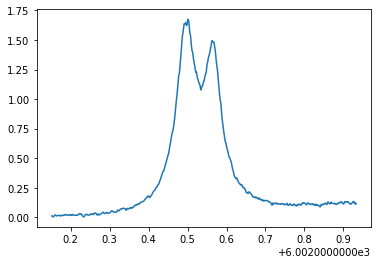

In [3]:

plt.plot(spectrum["Wavenumber"],spectrum["Intensity"])
plt.show()

[6002.534122 6002.533964 6002.533809 ... 6002.151604 6002.151446
 6002.151291]


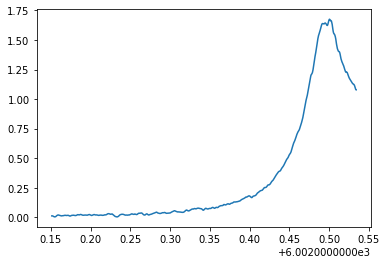

In [5]:
x = spectrum['Wavenumber'].values
y = spectrum['Intensity'].values
# print(x)
# print(y)
x_crop = x[2550:]
print(x_crop)
y_crop = y[2550:]
# %matplotlib
plt.plot(x_crop,y_crop)
# plt.plot(x,y+1)
plt.show()

In [6]:
def index_of(arrval, value):
    """Return index of array *at or below* value."""
    if value < min(arrval):
        return 0
    return max(np.where(arrval <= value)[0])


[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 5000
    # variables        = 3
    chi-square         = 65.1512652
    reduced chi-square = 0.01303808
    Akaike info crit   = -21696.4073
    Bayesian info crit = -21676.8558
    R-squared          = 0.93553187
[[Variables]]
    amplitude:  0.27030251 +/- 0.00105608 (0.39%) (init = 0.2529104)
    center:     6002.52600 +/- 3.4036e-04 (0.00%) (init = 6002.501)
    sigma:      0.03770808 +/- 2.1894e-04 (0.58%) (init = 0.02184683)
    gamma:      0.03770808 +/- 2.1894e-04 (0.58%) == 'sigma'
    fwhm:       0.13579776 +/- 7.8848e-04 (0.58%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     1.49608893 +/- 0.00694312 (0.46%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) = +0.6048
    C(center, sigma)    = -

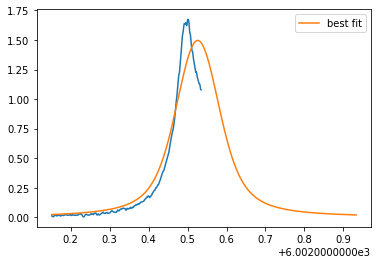

In [7]:


mod = VoigtModel()

pars = mod.guess(y_crop, x=x_crop)

out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))
fig, axes = plt.subplots()
axes.plot(x_crop, y_crop)
# axes.plot(x_crop, init, '--', label='initial fit')
axes.plot(x, out.best_fit, '-', label='best fit')
axes.legend()

[[Model]]
    (Model(voigt, prefix='v1_') + Model(voigt, prefix='v2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 5000
    # variables        = 6
    chi-square         = 1010.59652
    reduced chi-square = 0.20236214
    Akaike info crit   = -7982.48571
    Bayesian info crit = -7943.38256
    R-squared          = 4.9913e-11
##  Warning: uncertainties could not be estimated:
[[Variables]]
    v1_amplitude:  2914642.02 +/-        nan (nan%) (init = 0.4570115)
    v1_center:     824810.638 +/-        nan (nan%) (init = 6002.528)
    v1_sigma:      2480018.98 +/- 3.9350e+13 (1586695604.86%) (init = 0.03947743)
    v1_gamma:      2480018.98 +/- 0.00000000 (0.00%) == 'v1_sigma'
    v1_fwhm:       8931269.12 +/- 0.00000000 (0.00%) == '1.0692*v1_gamma+sqrt(0.8664*v1_gamma**2+5.545083*v1_sigma**2)'
    v1_height:     0.24528556 +/- 0.00000000 (0.00%) == '(v1_amplitude/(max(1e-15, v1_sigma*sqrt(2*pi))))*wofz((1j*v1_gamma)/(max(1e-1

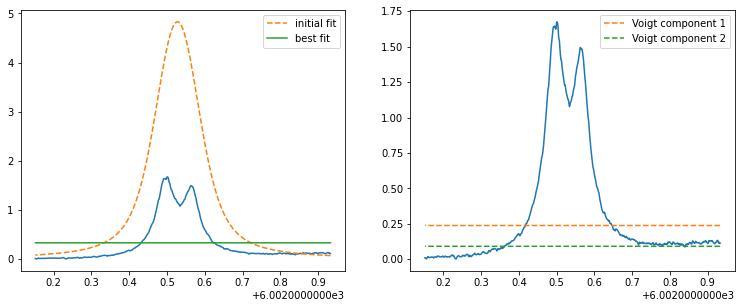

In [8]:
idx1 = index_of(x,6002.4)
idx2 = index_of(x,6002.55)


voigt1 = VoigtModel(prefix='v1_')
paras1 = voigt1.guess(y[:idx1],x=x[:idx1])


voigt2 = VoigtModel(prefix='v2_')
paras1.update(voigt2.guess(y[:idx2],x=x[:idx2]))


mod = voigt1 + voigt2 

init = mod.eval(paras1, x=x)
out = mod.fit(y, paras1, x=x)

print(out.fit_report(correl_mode='list'))

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y)
axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y)
axes[1].plot(x, comps['v1_'], '--', label='Voigt component 1')
axes[1].plot(x, comps['v2_'], '--', label='Voigt component 2')
# axes[1].plot(x, comps['exp_'], '--', label='Exponential component')
axes[1].legend()

plt.show()
# <end exam

In [11]:
file = 'voigt_data.csv'

spectrum2 = file_read(filepath=file)

In [12]:
spectrum2

,Wavenumber,Intensity
0,-10.00000,0.251302
1,-9.97998,0.278045
2,-9.95996,0.363456
3,-9.93994,0.425346
4,-9.91992,0.284943
...,...,...
995,9.91992,0.392008
996,9.93994,0.465899
997,9.95996,0.404773
998,9.97998,0.479516


In [13]:
data = spectrum2.to_numpy()

In [14]:
x = data.T[0]
y = data.T[1]

Parameters([('amplitude', <Parameter 'amplitude', value=166.42051903048502, bounds=[-inf:inf]>), ('center', <Parameter 'center', value=0.010010011173184284, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=1.1581583, bounds=[0.0:inf]>), ('gamma', <Parameter 'gamma', value=1.1581583, bounds=[-inf:inf], expr='sigma'>), ('fwhm', <Parameter 'fwhm', value=4.170864643329886, bounds=[-inf:inf], expr='1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'>), ('height', <Parameter 'height', value=29.990293028749775, bounds=[-inf:inf], expr='(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'>)])
[[Model]]
    Model(voigt)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 1000
    # variables        = 3
    chi-square         = 10.3675154
    reduced chi-square = 0.01039871
    Akaike info crit   = -4563.07788
    Bayesian info crit = -4548.35462
    R-squared          = 0.99972942
[[Variables

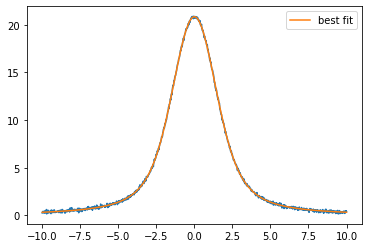

In [17]:
mod = VoigtModel()
paras = mod.guess(y, x=x)
print(paras)

out = mod.fit(y, paras, x=x)

print(out.fit_report(min_correl=0.25))
fig, axes = plt.subplots()
axes.plot(x, y)
axes.plot(x, out.best_fit, '-', label='best fit')
axes.legend()